Table 'mushroom_secondary_data.csv from: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset  (12/07/2023) \
Wagner,Dennis, Heider,D., and Hattab,Georges. (2023). Secondary Mushroom Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5FP5Q. \
Observations: 61.069

Columns:
0. class: edible=e and poisonous=p 
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w


problemsn:
- cap-surface: 23% missing values
- gill-attachment: 16% missing values
- gill-spacing: 41% missing values
- stem-root: 84% missing values
- stem-surface: 62% missing values
- veil-type: 94% miss - There are a lot of missing, but it explains the target variableing values
- veil-color: 87% missing values
- ring-type: 4% missing values
- spore-print-color: 89% missing values
- duplicated values: 146

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import lightgbm as lgb

import tensorflow as tf
import keras
from keras import models
from keras import layers

In [2]:
df = pd.read_csv('mushroom_secondary_data.csv', sep = ";")
# Shuffle data
df = df.sample(frac = 1, random_state = 1).reset_index(drop = True)

# Remove duplicates
df = df[~df.duplicated()]

# Remove bad columns:
df.drop(['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'spore-print-color'], axis = 1, inplace = True)

# Transforme class variable so edible is equals to 1 and 0 otherwise.
df['class'] = df.apply(lambda row:1 if row['class'] == 'e' else 0, axis = 1)

display(df)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,veil-color,has-ring,ring-type,habitat,season
0,1,1.72,x,s,y,f,d,w,7.01,2.36,y,NaN,f,f,h,u
1,1,9.59,f,e,b,f,NaN,b,4.73,20.49,w,NaN,t,f,d,a
2,0,0.86,x,g,p,f,a,p,4.25,1.05,k,NaN,f,f,d,s
3,0,4.32,x,NaN,e,f,x,w,4.91,6.58,w,NaN,f,f,d,u
4,1,2.80,x,s,w,f,d,w,3.13,5.69,w,NaN,f,f,m,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,13.81,x,k,n,t,p,y,10.06,31.63,y,NaN,f,f,d,a
61065,0,2.69,x,d,w,f,d,p,3.76,2.41,w,NaN,f,f,g,a
61066,1,11.70,f,NaN,g,f,s,u,7.36,20.73,b,NaN,f,f,l,a
61067,0,2.83,s,w,u,f,a,u,5.76,5.59,u,NaN,f,f,d,a


## Verify Missing

In [3]:
# Verify missing values
def verify_missing(df):
    df_missing = pd.DataFrame(df.isna().sum())
    df_missing.columns = ['quantity']
    df_missing['percent'] = (df_missing.quantity / len(df)) * 100
    return df_missing
    
df_missing = verify_missing(df.copy())
df_missing

,quantity,percent
class,0,0.000000
cap-diameter,0,0.000000
cap-shape,0,0.000000
cap-surface,14120,23.176797
cap-color,0,0.000000
does-bruise-or-bleed,0,0.000000
gill-attachment,9855,16.176157
gill-color,0,0.000000
stem-height,0,0.000000
stem-width,0,0.000000


In [4]:
# fill missing values
df.fillna('missing', inplace = True)

# Define type as category
var_category = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed'
               , 'gill-attachment', 'gill-color', 'stem-color', 'veil-color', 'has-ring', 'ring-type'
               , 'habitat', 'season']

for col in var_category:
    df[col] = df[col].astype('category')
    
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,veil-color,has-ring,ring-type,habitat,season
0,1,1.72,x,s,y,f,d,w,7.01,2.36,y,missing,f,f,h,u
1,1,9.59,f,e,b,f,missing,b,4.73,20.49,w,missing,t,f,d,a
2,0,0.86,x,g,p,f,a,p,4.25,1.05,k,missing,f,f,d,s
3,0,4.32,x,missing,e,f,x,w,4.91,6.58,w,missing,f,f,d,u
4,1,2.80,x,s,w,f,d,w,3.13,5.69,w,missing,f,f,m,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,13.81,x,k,n,t,p,y,10.06,31.63,y,missing,f,f,d,a
61065,0,2.69,x,d,w,f,d,p,3.76,2.41,w,missing,f,f,g,a
61066,1,11.70,f,missing,g,f,s,u,7.36,20.73,b,missing,f,f,l,a
61067,0,2.83,s,w,u,f,a,u,5.76,5.59,u,missing,f,f,d,a


## Preprocess data

In [5]:
# Split train, validation and test
df_train_aux, df_test = train_test_split(df, test_size = 0.10, random_state = 1, shuffle = True, stratify = df["class"])
df_train, df_val = train_test_split(df_train_aux, test_size = 0.10, random_state = 1, shuffle = True, stratify = df_train_aux["class"])
df_train.reset_index(drop = True, inplace = True)
df_val.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

print(f'Train observations: {len(df_train)}')
print(f'Validation observations: {len(df_val)}')
print(f'Test observations: {len(df_test)}')

Train observations: 49347
Validation observations: 5483
Test observations: 6093


In [6]:
# scale and label encode the attributes. Not necessary for LightGBM, but essential for autoencoder. 
continuous_varibles = ['cap-diameter', 'stem-height', 'stem-width']
categorical_variables = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed'
               , 'gill-attachment', 'gill-color', 'stem-color', 'veil-color', 'has-ring', 'ring-type'
               , 'habitat', 'season']
scaler = StandardScaler()
label_encoder = {}
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[continuous_varibles]), columns = continuous_varibles)
for col in categorical_variables[1:]:
    label_encoder[col] = preprocessing.LabelEncoder()
    X_encoded = label_encoder[col].fit_transform(df_train[col])
    le_name_mapping = dict(zip(label_encoder[col].classes_, label_encoder[col].transform(label_encoder[col].classes_)))
    if 'missing' in le_name_mapping:
        X_encoded[X_encoded == le_name_mapping['missing']] = 9999   # All missing values in all columns will be mapped as 9999
    df_train_scaled[col] = X_encoded
df_train_scaled['class'] = df_train['class']

df_val_scaled = pd.DataFrame(scaler.transform(df_val[continuous_varibles]), columns = [continuous_varibles])
for col in categorical_variables[1:]:
    X_encoded = label_encoder[col].transform(df_val[col])
    if 'missing' in le_name_mapping:
        X_encoded[X_encoded == le_name_mapping['missing']] = 9999   # All missing values in all columns will be mapped as 9999 
    df_val_scaled[col] = X_encoded
df_val_scaled['class'] = df_val['class']

df_test_scaled = pd.DataFrame(scaler.transform(df_test[continuous_varibles]), columns = [continuous_varibles])
for col in categorical_variables[1:]:
    X_encoded = label_encoder[col].transform(df_test[col])
    if 'missing' in le_name_mapping:
        X_encoded[X_encoded == le_name_mapping['missing']] = 9999   # All missing values in all columns will be mapped as 9999 
    df_test_scaled[col] = X_encoded
df_test_scaled['class'] = df_test['class']

# One-hot encode
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_fit = ohe.fit(df_train_scaled[categorical_variables[1:]].values)
df_train_scaled_ohe = pd.DataFrame(ohe_fit.transform(df_train_scaled[categorical_variables[1:]].values).toarray(), columns = ohe_fit.get_feature_names_out(categorical_variables[1:]))
df_train_scaled_ohe = df_train_scaled[['class', 'cap-diameter', 'stem-height', 'stem-width']].join(df_train_scaled_ohe)

df_val_scaled_ohe = pd.DataFrame(ohe_fit.transform(df_val_scaled[categorical_variables[1:]].values).toarray(), columns = ohe_fit.get_feature_names_out(categorical_variables[1:]))
df_val_scaled_ohe = df_val_scaled.loc[:,['class', 'cap-diameter', 'stem-height', 'stem-width']].join(df_val_scaled_ohe)
df_val_scaled_ohe.columns = ['class', 'cap-diameter', 'cap-height' ,'cap-width'] + [x for x in range(0,96)]

df_test_scaled_ohe = pd.DataFrame(ohe_fit.transform(df_test_scaled[categorical_variables[1:]].values).toarray(), columns = ohe_fit.get_feature_names_out(categorical_variables[1:]))
df_test_scaled_ohe = df_test_scaled[['class', 'cap-diameter', 'stem-height', 'stem-width']].join(df_test_scaled_ohe)
df_test_scaled_ohe.columns = ['class', 'cap-diameter', 'cap-height' ,'cap-width'] + [x for x in range(0,96)]

# Drop missing column
missing_col = df_train_scaled_ohe.columns.to_series().str.contains('9999').values
df_train_scaled_ohe = df_train_scaled_ohe.iloc[:,~missing_col]
df_val_scaled_ohe = df_val_scaled_ohe.iloc[:,~missing_col]
df_test_scaled_ohe = df_test_scaled_ohe.iloc[:,~missing_col]


df_train_scaled_ohe

,class,cap-diameter,stem-height,stem-width,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,...,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7,season_0,season_1,season_2,season_3
0,0,-0.888365,-0.524769,-1.042184,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.466723,0.548964,0.255466,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,-0.662517,-1.031809,-0.970148,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,-0.844714,0.003150,-0.827076,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.703959,-0.157910,0.474576,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,0,-0.901650,0.367026,-0.929128,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49343,1,-1.097132,-0.432309,-1.127227,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49344,1,0.442051,-0.035624,-0.193759,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49345,0,0.193428,-0.077380,-0.237781,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Models

In [7]:
def roc_curve_graph(y_true, y_pred, title):
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_cofusion_matrix(y_true, y_pred, title):
    # Confusion Matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['Verdadeiro Neg','Falso Pos','Falso Neg', 'Verdadeiro Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig = plt.figure(figsize=(8,5))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Real Values')
    ax.set_title(title, fontsize = 10)
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])
    plt.tight_layout()
    plt.show()
    plt.close()
    
def display_metrics(y_real, y_pred_prob, y_pred, title):
    roc = roc_auc_score(y_real, y_pred_prob)
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)

    print('ROC:', roc)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print()

    plot_cofusion_matrix(y_real, y_pred, title)

    # ROC curves, Cumulative gains, and KS - Out of Time
    # print('ROC, Cumulative Gains, KS: Out of Time')
    # y_out_of_time_pred_0 = 1 - y_pred 
    # y_out_of_time_prob = list(zip(y_out_of_time_pred_0, y_pred))
    # skplt.metrics.plot_roc(y_real, y_out_of_time_prob)
    # skplt.metrics.plot_cumulative_gain(y_real, y_out_of_time_prob)
    # skplt.metrics.plot_ks_statistic(y_real, y_out_of_time_prob)
    plt.show()
    plt.close()

## LightGBM without missing

In [8]:
# Edible = 1
X_train = df_train_scaled_ohe.drop(['class'], axis = 1)
y_train = df_train_scaled_ohe['class']

X_val = df_val_scaled_ohe.drop(['class'], axis = 1)
y_val = df_val_scaled_ohe['class']

X_test = df_test_scaled_ohe.drop(['class'], axis = 1)
y_test = df_test_scaled_ohe['class']

model = lgb.LGBMClassifier
hyperparameters_dict = {"objective": "binary",
            "metric": "binary_logloss",
            "boosting_type": "gbdt",
            'verbose': -1,
            'seed': 1,
            "num_iterations": 5000,
            "min_data_in_leaf": 1000,
            "max_depth": 10,
            "feature_fraction": 0.45,
            "learning_rate": 0.05}  

lightgbm_without_missing_fit = lgb.LGBMClassifier(**hyperparameters_dict).fit(X_train, y_train)
y_pred_prob_train_without_missing = lightgbm_without_missing_fit.predict_proba(X_train)[:,1]
y_pred_train_without_missing = [1 if x > 0.5 else 0 for x in y_pred_prob_train_without_missing]

y_pred_prob_val_without_missing = lightgbm_without_missing_fit.predict_proba(X_val)[:,1]
y_pred_val_without_missing = [1 if x > 0.5 else 0 for x in y_pred_prob_val_without_missing]

y_pred_prob_test_without_missing = lightgbm_without_missing_fit.predict_proba(X_test)[:,1]
y_pred_test_without_missing = [1 if x > 0.5 else 0 for x in y_pred_prob_test_without_missing]

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ROC: 0.999999563949527
Accuracy: 0.9998358772361726
Precision: 1.0
Recall: 0.9996320824135394
F1: 0.9998160073597057



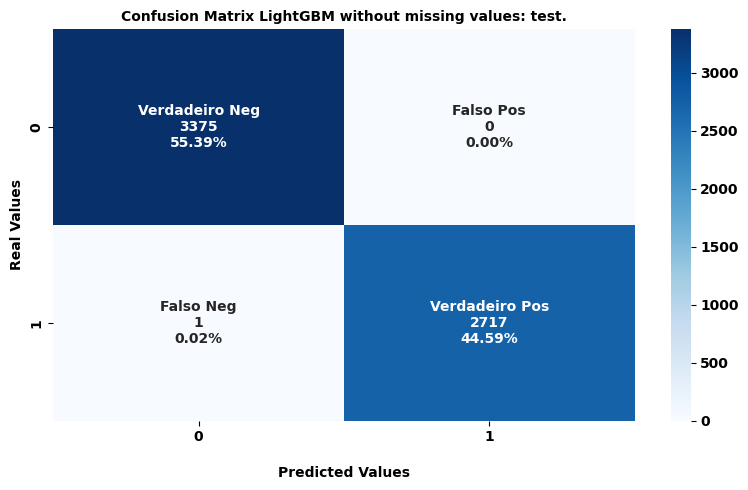

In [9]:
title = 'Confusion Matrix LightGBM without missing values: test.'
display_metrics(y_test, y_pred_prob_test_without_missing, y_pred_test_without_missing, title)

## LightGBM with only continuous variables

In [10]:
# Edible = 1
X_train_missing_100  = df_train_scaled_ohe.iloc[:,1:4].copy()
y_train = df_train_scaled_ohe['class']

X_val_missing_100  =  df_val_scaled_ohe.iloc[:,1:4].copy()
y_val = df_val_scaled_ohe['class']

X_test_missing_100  = df_test_scaled_ohe.iloc[:,1:4].copy()
y_test = df_test_scaled_ohe['class']


model = lgb.LGBMClassifier
hyperparameters_dict = {"objective": "binary",
            "metric": "binary_logloss",
            "boosting_type": "gbdt",
            'verbose': -1,
            'seed': 1,
            "num_iterations": 5000,
            "min_data_in_leaf": 100,
            "max_depth": 10,
            "feature_fraction": 0.45,
            "learning_rate": 0.05}  

lightgbm_missing_100_fit = lgb.LGBMClassifier(**hyperparameters_dict).fit(X_train_missing_100, y_train)
y_pred_prob_train_missing_100 = lightgbm_missing_100_fit.predict_proba(X_train_missing_100)[:,1]
y_pred_train_missing_100 = [1 if x > 0.5 else 0 for x in y_pred_prob_train_missing_100]

y_pred_prob_val_missing_100 = lightgbm_missing_100_fit.predict_proba(X_val_missing_100)[:,1]
y_pred_val_missing_100 = [1 if x > 0.5 else 0 for x in y_pred_prob_val_missing_100]

y_pred_prob_test_missing_100 = lightgbm_missing_100_fit.predict_proba(X_test_missing_100)[:,1]
y_pred_test_missing_100 = [1 if x > 0.5 else 0 for x in y_pred_prob_test_missing_100]

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


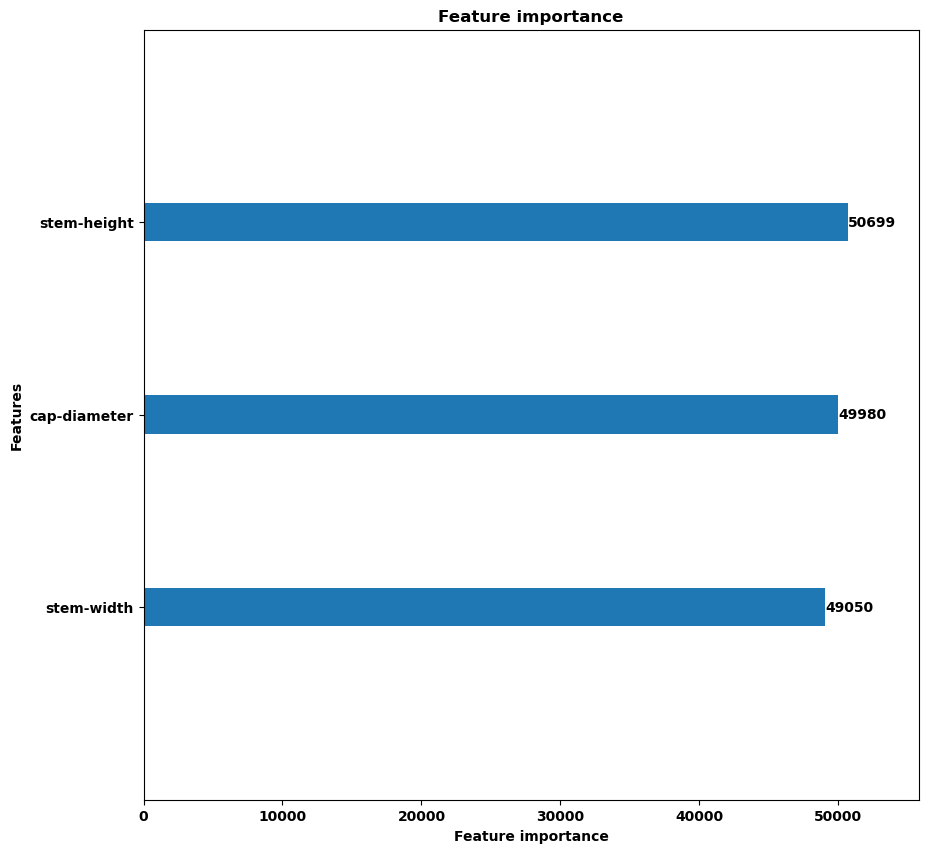

In [11]:
# Feature importance    
lgb.plot_importance(lightgbm_missing_100_fit, ignore_zero = False,grid = False, figsize = (10,10))
plt.show()
plt.close()

ROC: 0.7175769220287248
Accuracy: 0.6599376333497456
Precision: 0.6334710743801653
Recall: 0.5640176600441501
F1: 0.5967302452316076



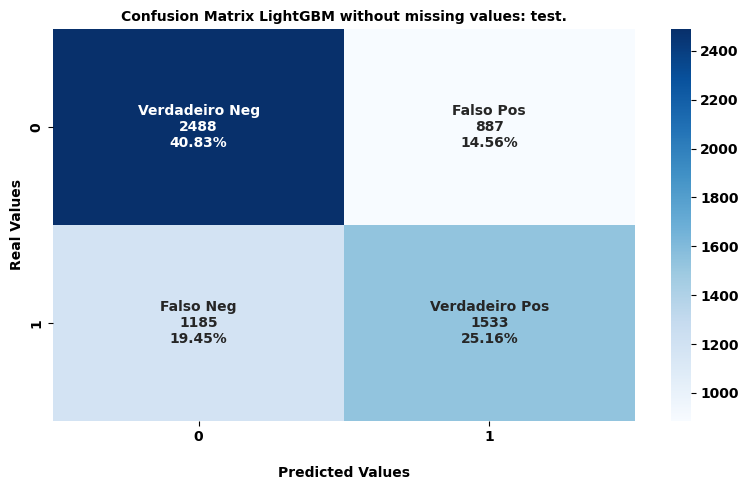

In [12]:
title = 'Confusion Matrix LightGBM without missing values: test.'
display_metrics(y_test, y_pred_prob_test_missing_100, y_pred_test_missing_100, title)

## LightGBM with only categorical variables

In [13]:
# Edible = 1
X_train_missing_100  = df_train_scaled_ohe.iloc[:,4:].copy()
y_train = df_train_scaled_ohe['class']

X_val_missing_100  = df_val_scaled_ohe.iloc[:,4:].copy()
y_val = df_val_scaled_ohe['class']

X_test_missing_100  = df_test_scaled_ohe.iloc[:,4:].copy()
y_test = df_test_scaled_ohe['class']


model = lgb.LGBMClassifier
hyperparameters_dict = {"objective": "binary",
            "metric": "binary_logloss",
            "boosting_type": "gbdt",
            'verbose': -1,
            'seed': 1,
            "num_iterations": 5000,
            "min_data_in_leaf": 1000,
            "max_depth": 10,
            "feature_fraction": 0.5,
            "learning_rate": 0.01}  

lightgbm_missing_100_fit = lgb.LGBMClassifier(**hyperparameters_dict).fit(X_train_missing_100, y_train)
y_pred_prob_train_missing_100 = lightgbm_missing_100_fit.predict_proba(X_train_missing_100)[:,1]
y_pred_train_missing_100 = [1 if x > 0.5 else 0 for x in y_pred_prob_train_missing_100]

y_pred_prob_val_missing_100 = lightgbm_missing_100_fit.predict_proba(X_val_missing_100)[:,1]
y_pred_val_missing_100 = [1 if x > 0.5 else 0 for x in y_pred_prob_val_missing_100]

y_pred_prob_test_missing_100 = lightgbm_missing_100_fit.predict_proba(X_test_missing_100)[:,1]
y_pred_test_missing_100 = [1 if x > 0.5 else 0 for x in y_pred_prob_test_missing_100]

C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ROC: 0.9997281225301828
Accuracy: 0.9898243886427047
Precision: 0.9911242603550295
Recall: 0.986019131714496
F1: 0.9885651051272593



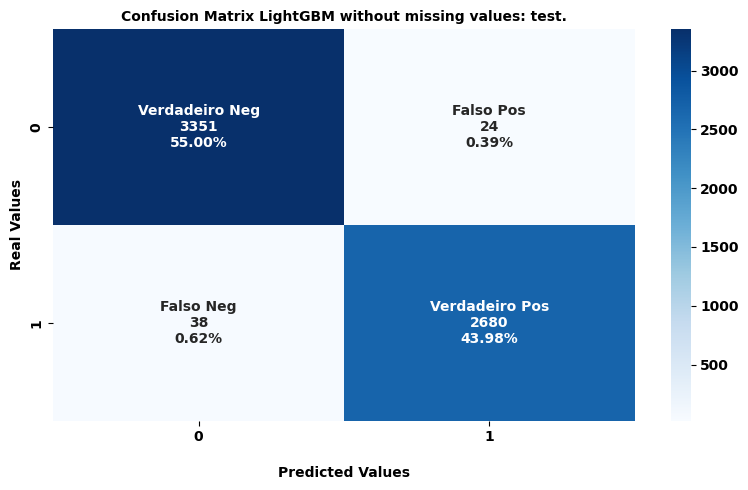

In [14]:
title = 'Confusion Matrix LightGBM without missing values: test.'
display_metrics(y_test, y_pred_prob_test_missing_100, y_pred_test_missing_100, title)

## Creates dataframes with missing values

In [15]:
# Creates dataframes with missing values
categorical_variables_X = categorical_variables[1:]
def make_missing_values(df):
    df_continuous = df.iloc[:,0:3].copy()  # Continuous variables
    df_categorical = df.iloc[:,3:].copy()  # categorical variables
    # Set missing values for all categorical variables
    df_dict = {}
    df_original_dict = {}
    missing_percent = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
            
    for e in missing_percent:
        missing_mask = np.random.binomial(1, 1 - e, df_categorical.shape)
        df_original_dict[e] = df_categorical.copy() 
        df_dict[e] = df_categorical.copy() * missing_mask
        # df_aux = pd.merge(df_continuous, df_aux, left_index = True, right_index = True)
    return df_dict, df_original_dict

X_train = df_train_scaled_ohe.drop(['class'], axis = 1)
# Set missing values for all categorical variables
X_train_missing, df_train_original_dict = make_missing_values(X_train.copy())
y_train = df_train_scaled_ohe['class']

X_val = df_val_scaled_ohe.drop(['class'], axis = 1)
# Set missing values for all categorical variables
X_val_missing, df_val_original_dict = make_missing_values(X_val.copy())
y_val = df_val_scaled_ohe['class']

X_test = df_test_scaled_ohe.drop(['class'], axis = 1)
# Set missing values for all categorical variables
X_test_missing, df_test_original_dict = make_missing_values(X_test.copy())
y_test = df_test_scaled_ohe['class']

X_train_missing[0.5]

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,cap-surface_0,cap-surface_1,cap-surface_2,...,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7,season_0,season_1,season_2,season_3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49343,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49344,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## LightGBM with missing

In [16]:
# White = 1
model = lgb.LGBMClassifier
hyperparameters_dict = {"objective": "binary",
            "metric": "binary_logloss",
            "boosting_type": "gbdt",
            'verbose': -1,
            'seed': 1,
            "num_iterations": 5000,
            "min_data_in_leaf": 1000,
            "max_depth": 10,
            "feature_fraction": 0.5,
            "learning_rate": 0.01}  

list_accuracy_train = []
list_accuracy_test = []
missing_percent = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
for e in missing_percent:
    # Input median for missing values. -> Not necessary because all the missing values are category and they were already threated.
    X_train_aux = X_train_missing[e].copy()
    # median = X_train_aux.median()
    # X_train_aux = X_train_aux.fillna(median)

    X_val_aux = X_val_missing[e].copy()
    # X_val_aux = X_val_aux.fillna(median)

    X_test_aux = X_test_missing[e].copy()
    # X_test_aux = X_test_aux.fillna(median)


    # Fit model
    lightgbm_aux_fit = lgb.LGBMClassifier(**hyperparameters_dict).fit(X_train_aux, y_train)
    # Predict
    y_pred_prob_train_aux = lightgbm_aux_fit.predict_proba(X_train_aux)[:,1]
    y_pred_train_aux = [1 if x > 0.5 else 0 for x in y_pred_prob_train_aux]

    y_pred_prob_val_aux = lightgbm_aux_fit.predict_proba(X_val_aux)[:,1]
    y_pred_val_aux = [1 if x > 0.5 else 0 for x in y_pred_prob_val_aux]
    
    y_pred_prob_test_aux = lightgbm_aux_fit.predict_proba(X_test_aux)[:,1]
    y_pred_test_aux = [1 if x > 0.5 else 0 for x in y_pred_prob_test_aux]

    list_accuracy_train.append(accuracy_score(y_train, y_pred_train_aux))
    list_accuracy_test.append(accuracy_score(y_test, y_pred_test_aux))



C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\maxwi\m

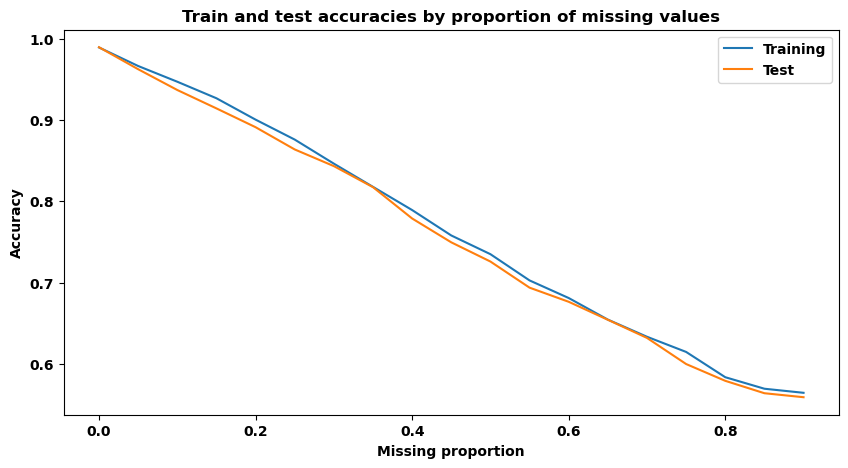

In [17]:
# Plot train and test accuracies by proportion of missing values
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(missing_percent, list_accuracy_train, label = 'Training')
axes.plot(missing_percent, list_accuracy_test, label = 'Test')
axes.set_xlabel('Missing proportion')
axes.set_ylabel('Accuracy')
axes.set_title("Train and test accuracies by proportion of missing values")
axes.legend()

plt.show()
plt.close();

In [18]:
pd.DataFrame(list(zip(missing_percent, list_accuracy_test)), columns = ['missing_percent', 'accuracy_test'])

,missing_percent,accuracy_test
0,0.00,0.989824
1,0.05,0.962744
2,0.10,0.937141
3,0.15,0.914492
4,0.20,0.891351
5,0.25,0.863942
6,0.30,0.843427
7,0.35,0.817495
8,0.40,0.778927
9,0.45,0.749549


## Denoising Autoencoder - Testing models

In [19]:
missing_rate = 0.3
# Sets with noise
X_train_aux = X_train_missing[missing_rate].copy()
X_val_aux = X_val_missing[missing_rate].copy()
X_test_aux = X_test_missing[missing_rate].copy()

# Sets without noise
X_train_original = df_train_original_dict[missing_rate].copy()
X_val_original = df_val_original_dict[missing_rate].copy()
X_test_original = df_test_original_dict[missing_rate].copy()

# Autoencoder
input_shape = X_train_aux.shape[1]

tf.keras.backend.clear_session()
model_encoder = models.Sequential([
    layers.Dense(90, activation = 'relu', input_shape = [input_shape]),
    layers.Dense(90, activation = 'sigmoid', input_shape = [90])
])
model_decoder = models.Sequential([
    layers.Dense(90, activation = 'relu', input_shape = [90]),
    layers.Dense(input_shape, activation = 'sigmoid', input_shape = [90])
])
model_autoencoder = models.Sequential([model_encoder, model_decoder])   
model_autoencoder.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.05),
                    loss = 'binary_crossentropy', metrics = ['binary_accuracy'])


model_1_history = model_autoencoder.fit(X_train_aux, X_train_original
                                        , validation_data = [X_val_aux, X_val_original]
                                        , verbose = 1 
                                        , epochs = 100)

Epoch 1/100
1543/1543 [==============================] - 12s 6ms/step - loss: 0.2947 - binary_accuracy: 0.8890 - val_loss: 0.2534 - val_binary_accuracy: 0.9075
Epoch 2/100
1543/1543 [==============================] - 10s 7ms/step - loss: 0.2521 - binary_accuracy: 0.9081 - val_loss: 0.2528 - val_binary_accuracy: 0.9074
Epoch 3/100
1543/1543 [==============================] - 10s 7ms/step - loss: 0.2516 - binary_accuracy: 0.9083 - val_loss: 0.2524 - val_binary_accuracy: 0.9081
Epoch 4/100
1543/1543 [==============================] - 11s 7ms/step - loss: 0.2512 - binary_accuracy: 0.9087 - val_loss: 0.2520 - val_binary_accuracy: 0.9089
Epoch 5/100
1543/1543 [==============================] - 11s 7ms/step - loss: 0.2507 - binary_accuracy: 0.9090 - val_loss: 0.2515 - val_binary_accuracy: 0.9096
Epoch 6/100
1543/1543 [==============================] - 10s 6ms/step - loss: 0.2502 - binary_accuracy: 0.9094 - val_loss: 0.2508 - val_binary_accuracy: 0.9095
Epoch 7/100
1543/1543 [=================

In [23]:
model_autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 90)                16560     
                                                                 
 sequential_1 (Sequential)   (None, 92)                16562     
                                                                 
Total params: 33,122
Trainable params: 33,122
Non-trainable params: 0
_________________________________________________________________


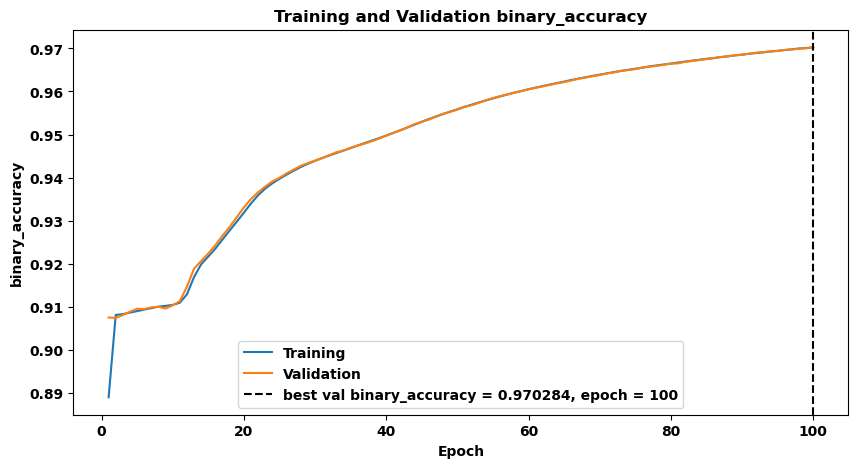

(100, 0.9702840447425842)

In [20]:
# Plot the training and validation history
def plot_train_val_metric(model_history, metric, ylabel):
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.plot(range(1, len(model_history.history[metric]) + 1), model_history.history[metric], label='Training')
    axes.plot(range(1, len(model_history.history[metric]) + 1), model_history.history['val_' + metric], label='Validation')
    best_metric = np.nanmax(model_history.history['val_' + metric])
    epoch_best_metric = np.nanargmax(model_history.history['val_' + metric]) + 1
    axes.axvline(epoch_best_metric,
                    c='k', ls='--',
                    label=f'best val {metric} = {best_metric:.6f}, epoch = {epoch_best_metric}')


    axes.set_xlabel('Epoch')
    axes.set_ylabel(ylabel)
    axes.set_title(f"Training and Validation {metric}")
    axes.legend()
    
    plt.show()
    plt.close();
    
    return epoch_best_metric, best_metric
plot_train_val_metric(model_1_history, 'binary_accuracy', ylabel = 'binary_accuracy')    

In [21]:
# Get codings
codings_X_train = pd.DataFrame(model_encoder.predict(X_train_aux))
for col in codings_X_train.columns:
    codings_X_train[col] = np.where(codings_X_train[col] > 0.5, 1, 0)
    
codings_X_val = pd.DataFrame(model_encoder.predict(X_val_aux))
for col in codings_X_val.columns:
    codings_X_val[col] = np.where(codings_X_val[col] > 0.5, 1, 0)
    
codings_X_test = pd.DataFrame(model_encoder.predict(X_test_aux))
for col in codings_X_test.columns:
    codings_X_test[col] = np.where(codings_X_test[col] > 0.5, 1, 0)


# LightGBM
model = lgb.LGBMClassifier
hyperparameters_dict = {"objective": "binary",
            "metric": "binary_logloss",
            "boosting_type": "gbdt",
            'verbose': -1,
            'seed': 1,
            "num_iterations": 5000,
            "min_data_in_leaf": 1000,
            "max_depth": 10,
            "feature_fraction": 0.5,
            "learning_rate": 0.01}  

lightgbm_fit_2 = lgb.LGBMClassifier(**hyperparameters_dict).fit(codings_X_train, y_train)
y_pred_prob_train_2 = lightgbm_fit_2.predict_proba(codings_X_train)[:,1]
y_pred_train_2 = [1 if x > 0.5 else 0 for x in y_pred_prob_train_2]

y_pred_prob_val_2 = lightgbm_fit_2.predict_proba(codings_X_val)[:,1]
y_pred_val_2 = [1 if x > 0.5 else 0 for x in y_pred_prob_val_2]

y_pred_prob_test_2 = lightgbm_fit_2.predict_proba(codings_X_test)[:,1]
y_pred_test_2 = [1 if x > 0.5 else 0 for x in y_pred_prob_test_2]

191/191 [==============================] - 0s 991us/step


C:\Users\maxwi\miniconda3\envs\e82_autoencoder\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ROC: 0.9499829395252501
Accuracy: 0.8764155588380108
Precision: 0.8653774637411678
Recall: 0.8561442236938925
F1: 0.8607360828555576



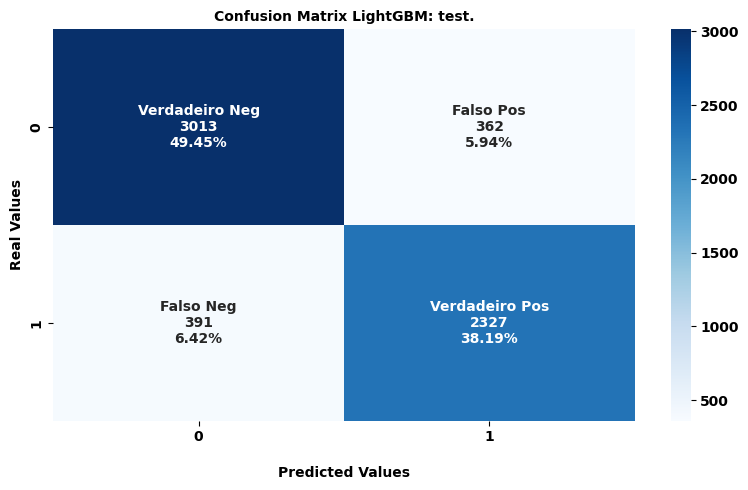

In [22]:
title = 'Confusion Matrix LightGBM: test.'
display_metrics(y_test, y_pred_prob_test_2, y_pred_test_2, title)

## Denoising Autoencoder

In [23]:
list_accuracy_with_autoencoder_train = []
list_accuracy_with_autoencoder_test = []
missing_percent = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
for missing_rate in missing_percent:
    # Denoising Autoencoder
    X_train_aux = X_train_missing[missing_rate].copy()
    X_val_aux = X_val_missing[missing_rate].copy()
    X_test_aux = X_test_missing[missing_rate].copy()
    
    # Transform category to int
    X_train_original = df_train_original_dict[missing_rate].copy()
    X_val_original = df_val_original_dict[missing_rate].copy()
    X_test_original = df_test_original_dict[missing_rate].copy()
    
    # Autoencoder
    input_shape = X_train_aux.shape[1]
    
    tf.keras.backend.clear_session()
    model_encoder = models.Sequential([
        layers.Dense(90, activation = 'relu', input_shape = [input_shape]),
        layers.Dense(90, activation = 'sigmoid', input_shape = [90])
    ])
    model_decoder = models.Sequential([
        layers.Dense(90, activation = 'relu', input_shape = [90]),
        layers.Dense(input_shape, activation = 'sigmoid', input_shape = [90])
    ])
    model_autoencoder = models.Sequential([model_encoder, model_decoder])   
    model_autoencoder.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.05),
                        loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    
    
    model_1_history = model_autoencoder.fit(X_train_aux, X_train_original
                                            , validation_data = [X_val_aux, X_val_original]
                                            , verbose = 0
                                            , epochs = 100)

    # Get codings
    codings_X_train = pd.DataFrame(model_encoder.predict(X_train_aux))
    for col in codings_X_train.columns:
        codings_X_train[col] = np.where(codings_X_train[col] > 0.5, 1, 0)
        
    codings_X_val = pd.DataFrame(model_encoder.predict(X_val_aux))
    for col in codings_X_val.columns:
        codings_X_val[col] = np.where(codings_X_val[col] > 0.5, 1, 0)
        
    codings_X_test = pd.DataFrame(model_encoder.predict(X_test_aux))
    for col in codings_X_test.columns:
        codings_X_test[col] = np.where(codings_X_test[col] > 0.5, 1, 0)
    
    # LightGBM
    model = lgb.LGBMClassifier
    hyperparameters_dict = {"objective": "binary",
            "metric": "binary_logloss",
            "boosting_type": "gbdt",
            'verbose': -1,
            'seed': 1,
            "num_iterations": 5000,
            "min_data_in_leaf": 1000,
            "max_depth": 10,
            "feature_fraction": 0.5,
            "learning_rate": 0.01}  
    
    lightgbm_fit_2_aux = lgb.LGBMClassifier(**hyperparameters_dict).fit(codings_X_train, y_train)
    y_pred_prob_train_2_aux = lightgbm_fit_2_aux.predict_proba(codings_X_train)[:,1]
    y_pred_train_2_aux = [1 if x > 0.5 else 0 for x in y_pred_prob_train_2_aux]
    
    y_pred_prob_val_2_aux = lightgbm_fit_2_aux.predict_proba(codings_X_val)[:,1]
    y_pred_val_2_aux = [1 if x > 0.5 else 0 for x in y_pred_prob_val_2_aux]
    
    y_pred_prob_test_2_aux = lightgbm_fit_2_aux.predict_proba(codings_X_test)[:,1]
    y_pred_test_2_aux = [1 if x > 0.5 else 0 for x in y_pred_prob_test_2_aux]

    list_accuracy_with_autoencoder_train.append(accuracy_score(y_train, y_pred_train_2_aux))
    list_accuracy_with_autoencoder_test.append(accuracy_score(y_test, y_pred_test_2_aux))

191/191 [==============================] - 0s 448us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 471us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 443us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 442us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 429us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 463us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 864us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 418us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 446us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 891us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 399us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 447us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 658us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 440us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 431us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 430us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 442us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 442us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


191/191 [==============================] - 0s 402us/step


/home/max/miniconda3/envs/e82_autoencoder/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


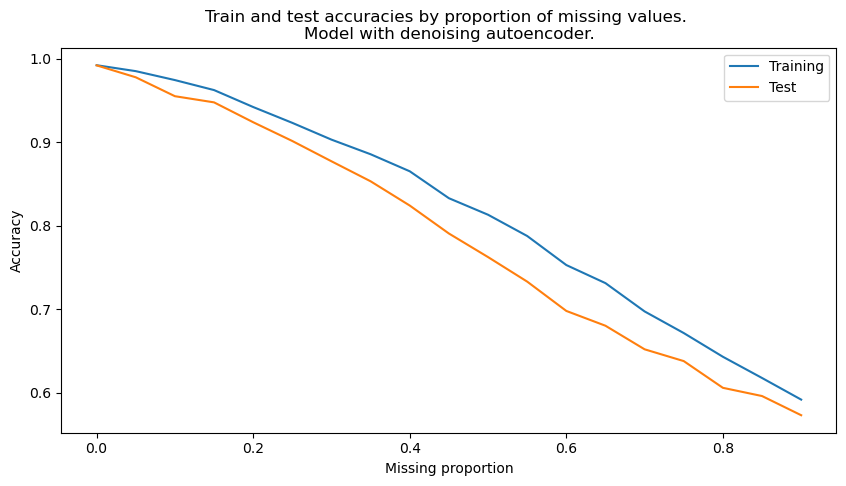

In [24]:
# Plot train and test accuracies by proportion of missing values
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(missing_percent, list_accuracy_with_autoencoder_train, label = 'Training')
axes.plot(missing_percent, list_accuracy_with_autoencoder_test, label = 'Test')
axes.set_xlabel('Missing proportion')
axes.set_ylabel('Accuracy')
axes.set_title("Train and test accuracies by proportion of missing values. \nModel with denoising autoencoder.")
axes.legend()

plt.show()
plt.close();

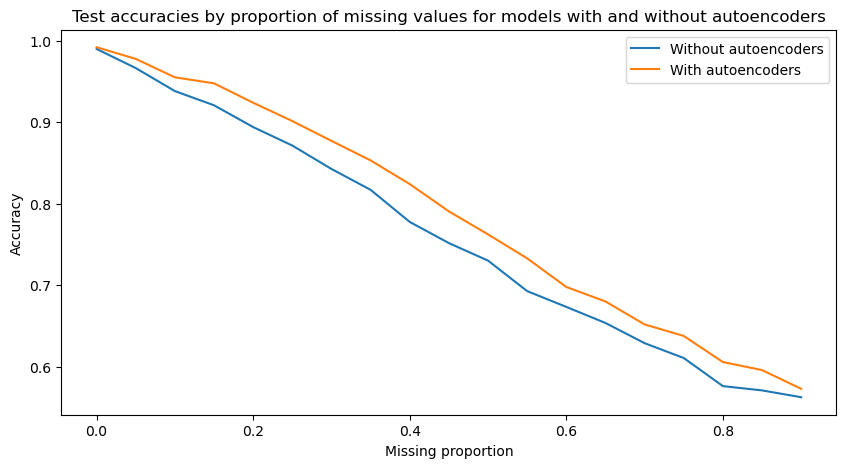

In [25]:
# Plot test accuracies by proportion of missing values for models with and without autoencoders
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(missing_percent, list_accuracy_test, label = 'Without autoencoders')
axes.plot(missing_percent, list_accuracy_with_autoencoder_test, label = 'With autoencoders')
axes.set_xlabel('Missing proportion')
axes.set_ylabel('Accuracy')
axes.set_title("Test accuracies by proportion of missing values for models with and without autoencoders")
axes.legend()

plt.show()
plt.close();